# WeRateDogs Data Analysis

## Project: Wrangle and Analyze

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Gathering Data</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#analysis">Analysis and Visualizations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
[WeRateDogs](https://twitter.com/dog_rates)  is a Twitter account that rates people's dogs with a humorous comment about the dog. For this project, I will gather data from WeRateDogs Twitter account and other sources in a variety of formats, assess the quality and tidiness, then clean it. I will then showcase wrangling efforts through analyses and visualizations. 

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import requests
import os
import tweepy
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

<a id='gathering'></a>
## Gathering Data
Gather data from three (3) different sources in three (3) different file formats and import into separate pandas DataFrames.
1. Read CSV using pandas and save as Dataframe `twitter_archive_enhanced`
2. Programmatically download TSV using Requests and save as Dataframe `image_predictions`
3. Query Twitter API for JSON data using Tweepy library and read into Dataframe `tweet-data`

In [2]:
# Read Twitter CSV as Pandas DataFrame
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
# Programmatically download image predictions TSV using Requests library
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_predictions_url)

with open("image_predictions.tsv", mode = 'wb') as f:
    f.write(response.content)

In [4]:
# Read image predictions TSV as Pandas DataFrame
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [5]:
# Query Twitter API for JSON data using Tweepy library 
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# Gather tweet_ids
tweet_ids = twitter_archive_enhanced.tweet_id.values

In [7]:
# Use Twitter API to add new line for tweet_id from JSON file
# If Tweet is not found, add to DNU_tweets array
DNU_tweets = {}

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print(f"Tweet ID: {tweet_id} does not exist - do not use") 
            DNU_tweets[tweet_id] = e
            pass

print(DNU_tweets)

Tweet ID: 888202515573088257 does not exist - do not use
Tweet ID: 873697596434513921 does not exist - do not use
Tweet ID: 872668790621863937 does not exist - do not use
Tweet ID: 872261713294495745 does not exist - do not use
Tweet ID: 869988702071779329 does not exist - do not use
Tweet ID: 866816280283807744 does not exist - do not use
Tweet ID: 861769973181624320 does not exist - do not use
Tweet ID: 856602993587888130 does not exist - do not use
Tweet ID: 851953902622658560 does not exist - do not use
Tweet ID: 845459076796616705 does not exist - do not use
Tweet ID: 844704788403113984 does not exist - do not use
Tweet ID: 842892208864923648 does not exist - do not use
Tweet ID: 837366284874571778 does not exist - do not use
Tweet ID: 837012587749474308 does not exist - do not use
Tweet ID: 829374341691346946 does not exist - do not use
Tweet ID: 827228250799742977 does not exist - do not use
Tweet ID: 812747805718642688 does not exist - do not use
Tweet ID: 802247111496568832 do

In [8]:
# Read tweet_json.txt line by line into dataframe
# Include tweet_id, retweets, favorites, timestamp
json_tweet_list = []
with open('tweet_json.txt') as json_file:
    for row in json_file:
        json_data = json.loads(row)
        json_tweet_list.append({
            "tweet_id":json_data["id"],
            "favorites":json_data["favorite_count"],
            "retweets":json_data["retweet_count"],
            "timestamp":json_data["created_at"]})

tweet_data = pd.DataFrame(json_tweet_list, columns=['tweet_id', 'favorites', 'retweets', 'timestamp'])
tweet_data.head()

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,35096,7386,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,30384,5500,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,22845,3635,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,38367,7563,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,36640,8147,Sat Jul 29 16:00:24 +0000 2017


<a id='assessing'></a>
## Assessing Data
Assess the above pieces of data both visually and programmatically for quality and tidiness issues. The visual assessment involves scrolling through the data in Excel or using a function on `head` where we return all rows except the last <em>n</em> rows and/or print a random sample size. Whereas the programmatic assessment requires using code to view the data. For example, using pandas methods: `head`, `tail`, and `info`. To limit the scope of this assessment, I will be detecting and documenting at least two (2) tidiness issues and eight (8) quality issues.

### Visual Assessment

In [9]:
twitter_archive_enhanced[:50]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
814,692568918515392513,https://pbs.twimg.com/media/CZx_wV2UMAArgsJ.jpg,2,golden_retriever,0.636845,True,Labrador_retriever,0.163362,True,Pekinese,0.045554,True
820,692919143163629568,https://pbs.twimg.com/media/CZ2-SRiWcAIjuM5.jpg,1,Saint_Bernard,0.612635,True,English_springer,0.269744,True,boxer,0.048666,True
1869,844580511645339650,https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg,1,washer,0.903064,False,dishwasher,0.032489,False,printer,0.016456,False
1792,830956169170665475,https://pbs.twimg.com/ext_tw_video_thumb/83095...,1,kuvasz,0.451516,True,golden_retriever,0.317196,True,English_setter,0.132759,True
1800,831911600680497154,https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg,4,bloodhound,0.777562,True,Great_Dane,0.047418,True,Leonberg,0.017943,True
1185,738885046782832640,https://pbs.twimg.com/media/CkEMBz9WYAAGLaa.jpg,1,bath_towel,0.878320,False,swab,0.020633,False,American_Staffordshire_terrier,0.015535,True
1832,836677758902222849,https://pbs.twimg.com/media/C5x57-TWUAEawQh.jpg,2,leopard,0.797410,False,jaguar,0.095487,False,snow_leopard,0.079694,False
1818,834167344700198914,https://pbs.twimg.com/media/C5OOxY6WAAAxERz.jpg,1,ox,0.991682,False,bison,0.005335,False,water_buffalo,0.001130,False
906,700167517596164096,https://pbs.twimg.com/media/Cbd-o8hWwAE4OFm.jpg,1,beagle,0.162585,True,Pembroke,0.120481,True,Siberian_husky,0.110284,True
368,672968025906282496,https://pbs.twimg.com/media/CVbc2V2WsAE3-kn.jpg,1,toy_poodle,0.678046,True,miniature_poodle,0.160273,True,Airedale,0.065649,True


### Programmatic Assessment

In [11]:
twitter_archive_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [15]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
tweet_data.tail()

,tweet_id,favorites,retweets,timestamp
2326,666049248165822465,94,38,Mon Nov 16 00:24:50 +0000 2015
2327,666044226329800704,260,122,Mon Nov 16 00:04:52 +0000 2015
2328,666033412701032449,107,39,Sun Nov 15 23:21:54 +0000 2015
2329,666029285002620928,118,41,Sun Nov 15 23:05:30 +0000 2015
2330,666020888022790149,2344,444,Sun Nov 15 22:32:08 +0000 2015


In [18]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   int64 
 1   favorites  2331 non-null   int64 
 2   retweets   2331 non-null   int64 
 3   timestamp  2331 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


In [19]:
twitter_archive_enhanced.shape, image_predictions.shape, tweet_data.shape

((2356, 17), (2075, 12), (2331, 4))

### Assessment Results
As a result of the assessment above, the following issues were identified:

#### Data Tidiness
* Combine the three (3) dataframes as `twitter_archive_master`
* Combine dog stage columns from original `twitter_archive_enhanced` dataset into single column and rename

#### Data Quality 
##### `twitter_archive_enhanced` dataset
* Remove retweets and reply columns, they are considered duplicates
* Drop rows/remove tweets with missing images
* `name` column has invald names e.g. 'None', lowercase, or outliers under 3 characters
* Clean `source` column due to `<a>` link element for hyperlinks which makes it difficult to read 
* Convert null values on ratings
* Pull and update the incorrectly identified numerators and denominators from `text` column
* `rating_numerator` column has outlier values that are too high
* `rating_denominator` will need to have a base of ten (10)
* Convert column datatypes because no operations will need to be run on them

##### `image_predictions` dataset
* Make all image prediction strings in columns p1, p2, and p3 lowercase
*  Rename prediction columns to something more meaningful

##### `tweet_data` dataset
* Remove any duplicate `tweet_ids`
* Convert `timestamp` datatype via `to_datetime`

<a id='cleaning'></a>
## Cleaning Data
Using pandas, I will clean the tidiness and quality issues identified above. Even though I will be addressing the tidiness first by combining the datasets, it was important for me to initially assess the cleaning tasks based on each individual dataset as outlined above.

#### Data Tidiness
Combine the three (3) dataframes and save as CSV.

In [20]:
# Combine all three (3) datasets
twitter_archive_master = pd.merge(pd.merge(image_predictions, tweet_data, on="tweet_id"),twitter_archive_enhanced, on="tweet_id")

In [21]:
# Save to CSV
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [22]:
twitter_archive_master.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


#### NOTE
Combine dog stage columns from `twitter_archive_enhanced` dataset into single column and rename `dog_stage`. Then, clean up the dataset by dropping the original dog stage columns.

In [23]:
twitter_archive_master.shape

(2059, 31)

In [24]:
# Combine dog stage columns into single column named `dog_stage`
twitter_archive_master['dog_stage'] = twitter_archive_master[['doggo', 'floofer', 'pupper', 'puppo']] \
.apply(lambda x: ','.join(x).replace('None,', '').replace(',None', ''), axis=1)

In [25]:
# Delete original dog stage columns
twitter_archive_master.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [26]:
# Confirm
twitter_archive_master.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None


#### Data Quality
Address duplicates:
* Remove retweets and reply columns because they are considered duplicates
    * Include any extraneous columns like `expanded_urls` that will not be needed for this analysis
* Also remove any duplicated `tweet_id`

In [27]:
# Delete retweets
twitter_archive_master = twitter_archive_master[twitter_archive_master['retweeted_status_id'].isnull()]
twitter_archive_master.shape

(1987, 28)

In [28]:
# Delete all columns relating to replies or retweets 
# Also remove `expanded_urls` because they are not needed
twitter_archive_master.drop(columns=['in_reply_to_status_id', 
                   'in_reply_to_user_id', 
                   'retweeted_status_id', 
                   'retweeted_status_user_id',
                   'retweeted_status_timestamp',
                    'expanded_urls'], inplace=True)

In [29]:
# Delete duplicated tweet_id
twitter_archive_master = twitter_archive_master.drop_duplicates()

#### NOTE
Remove tweets with no images URLs:

In [30]:
# Delete tweets with no images
twitter_archive_master = twitter_archive_master.dropna(subset = ['jpg_url'])

In [31]:
# Confirm
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1987 non-null   int64  
 1   jpg_url             1987 non-null   object 
 2   img_num             1987 non-null   int64  
 3   p1                  1987 non-null   object 
 4   p1_conf             1987 non-null   float64
 5   p1_dog              1987 non-null   bool   
 6   p2                  1987 non-null   object 
 7   p2_conf             1987 non-null   float64
 8   p2_dog              1987 non-null   bool   
 9   p3                  1987 non-null   object 
 10  p3_conf             1987 non-null   float64
 11  p3_dog              1987 non-null   bool   
 12  favorites           1987 non-null   int64  
 13  retweets            1987 non-null   int64  
 14  timestamp_x         1987 non-null   object 
 15  timestamp_y         1987 non-null   object 
 16  source

#### NOTE
Clean up the timestamp columns and rename. Then, convert `timestamp` datatype via `to_datetime`. 

In [32]:
# Rename `timestamp_x` to `timestamp`
twitter_archive_master.rename(columns={'timestamp_x': 'timestamp'}, inplace=True)

In [33]:
# Delete `timestamp_y`
twitter_archive_master.drop(columns = ['timestamp_y'], inplace=True)

In [34]:
# Convert `timestamp` via to_datetime
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   int64              
 1   jpg_url             1987 non-null   object             
 2   img_num             1987 non-null   int64              
 3   p1                  1987 non-null   object             
 4   p1_conf             1987 non-null   float64            
 5   p1_dog              1987 non-null   bool               
 6   p2                  1987 non-null   object             
 7   p2_conf             1987 non-null   float64            
 8   p2_dog              1987 non-null   bool               
 9   p3                  1987 non-null   object             
 10  p3_conf             1987 non-null   float64            
 11  p3_dog              1987 non-null   bool               
 12  favorites           1987 non-null 

#### NOTE
Clean up the `name` column because it has invald names e.g. 'None', lowercase, or outliers under 3 characters:

In [35]:
# Pull sample to find names that are obviously not valid as defined above
twitter_archive_master.name.sample(50)

2008          a
1108      Sugar
1627      Major
41            a
1058    Calbert
1130    Raymond
907        Kaia
1965       Cody
446      Rodman
1244       None
854     Trevith
1732       None
670       Larry
1418       Finn
427      Bobbay
1044    Stubert
440        None
1396     Oakley
1949       Lili
399      George
322       Dylan
637       Sarge
841       Brian
781        None
827        Phil
1842       None
1159     Livvie
488        None
583        None
1065       Toby
163      Jaycob
1137       None
702        None
1631    Waffles
1609       Loki
1912      Oscar
1445          O
895        Dave
113        Otis
235           a
660        None
1187       None
54         None
333       Bubba
720     Lorelei
1725       None
91         Kial
906      Murphy
457        None
1648        Gus
Name: name, dtype: object

In [36]:
# Pull value counts for lowercase names
twitter_archive_master[twitter_archive_master['name'].str.islower()]['name'].value_counts()

a               55
the              7
an               6
one              4
very             4
quite            3
just             3
getting          2
such             1
incredibly       1
by               1
my               1
space            1
all              1
not              1
this             1
his              1
light            1
infuriating      1
officially       1
actually         1
unacceptable     1
Name: name, dtype: int64

In [37]:
# Replace the above listed names with "None"
twitter_archive_master['name'].replace(['a',
                                        'the',
                                        'an',
                                        'very',
                                        'one',
                                        'quite',
                                        'just', 
                                        'getting',
                                        'unacceptable',
                                        'his',
                                        'all',
                                        'my',
                                        'such',
                                        'officially',
                                        'light',
                                        'not',
                                        'actually',
                                        'by',
                                        'infuriating',
                                        'space',
                                        'incredibly',
                                        'this',], 'None', inplace=True)

In [38]:
# Confirm
twitter_archive_master[twitter_archive_master['name'].str.islower()]['name'].value_counts()

Series([], Name: name, dtype: int64)

#### NOTE
Clean source column to remove URL and only save the source text e.g. "Twitter for iPhone":

In [39]:
# Double check source column format
twitter_archive_master.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,p3_dog,favorites,retweets,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,True,2344,444,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,8,10,None,None


In [40]:
# Clean source column
twitter_archive_master['source'] = twitter_archive_master['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [41]:
# Confirm
twitter_archive_master.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,p3_dog,favorites,retweets,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,True,2344,444,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,None
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,True,118,41,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,None,None
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,True,107,39,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,None,None


#### NOTE
Convert null values:

In [42]:
# Convert null values
twitter_archive_master.loc[twitter_archive_master['rating_numerator'] == 'NaN', 'rating_numerator'] = 0
twitter_archive_master.loc[twitter_archive_master['rating_denominator'] == 'NaN', 'rating_denominator'] = 10

#### NOTE
Pull and update the incorrectly identified scores from `text` column. This means the ratings were supplied in the text when they should have been included in the `rating_numerator` and `rating_denominator` columns:

In [43]:
# Find instances where there is more than one #/# in 'text' column and extract
twitter_archive_master['rating_numerator'] = twitter_archive_master.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

#### NOTE
Due to very high outliers in the numerator values, any row with a numerator rating greater than fifteen (15) will be dropped:

In [44]:
twitter_archive_master.rating_numerator.unique()

array(['8', '7', '9', '6', '5', '10', '2', '11', '1', '3', '12', '4',
       '13', '420', '88', '144', '11.26', '121', '143', '14', '44', '60',
       '45', '80', '99', '50', '204', '0', '1776', '165', '11.27', '9.75',
       '24', '84', '13.5'], dtype=object)

In [45]:
# Convert from string to float
twitter_archive_master.rating_numerator = twitter_archive_master.rating_numerator.astype(float)

In [46]:
# Drop numerators over 15
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master['rating_numerator'] > 15].index, inplace = True)

#### NOTE
Set all `rating_denominator` to ten (10):

In [47]:
# Check for denominators that are not equal to 10
twitter_archive_master[(twitter_archive_master['rating_denominator'] != 10)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,p3_dog,favorites,retweets,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,...,True,131,57,2015-11-16 16:11:11+00:00,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,1.0,2,None,None
666,682962037429899265,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,...,False,35362,15699,2016-01-01 16:30:13+00:00,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,7.0,11,Darrel,None
1104,722974582966214656,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,...,True,3946,1497,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,4.0,20,None,None
1195,740373189193256964,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,...,True,33792,12754,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",9.0,11,None,None


In [48]:
# Set all denominators to 10
twitter_archive_master.rating_denominator = 10.0

In [49]:
# Confirm
twitter_archive_master.rating_denominator.unique()

array([10.])

#### NOTE
Convert column datatypes by updating to string, [category](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html), int, and float accordingly because for some no operations will be run on them:

In [50]:
twitter_archive_master['tweet_id'] = twitter_archive_master['tweet_id'].astype('str')
twitter_archive_master['source'] = twitter_archive_master['source'].astype('category')
twitter_archive_master['favorites'] = twitter_archive_master['favorites'].astype(int)
twitter_archive_master['retweets'] = twitter_archive_master['retweets'].astype(int)
twitter_archive_master['dog_stage'] = twitter_archive_master['dog_stage'].astype('category')
twitter_archive_master['rating_numerator'] = twitter_archive_master['rating_numerator'].astype(float)
twitter_archive_master['rating_denominator'] = twitter_archive_master['rating_denominator'].astype(float)

In [51]:
# Confirm
twitter_archive_master.dtypes

tweet_id                           object
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
favorites                           int32
retweets                            int32
timestamp             datetime64[ns, UTC]
source                           category
text                               object
rating_numerator                  float64
rating_denominator                float64
name                               object
dog_stage                        category
dtype: object

#### NOTE
Make all image prediction strings in columns p1, p2, and p3 lowercase:

In [52]:
twitter_archive_master['p1'] = [row.lower() for row in twitter_archive_master['p1']]
twitter_archive_master['p2'] = [row.lower() for row in twitter_archive_master['p2']]
twitter_archive_master['p3'] = [row.lower() for row in twitter_archive_master['p3']]

#### NOTE
Rename prediction columns to something more meaningful e.g. prediction_1:

In [53]:
twitter_archive_master.rename(columns= {
                        'p1': 'prediction_1',
                        'p2': 'prediction_2',
                        'p3': 'prediction_3',}, inplace=True)

In [54]:
# Confirm
twitter_archive_master[['prediction_1','prediction_2','prediction_3']]

,prediction_1,prediction_2,prediction_3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
...,...,...,...
2054,basset,english_springer,german_short-haired_pointer
2055,paper_towel,labrador_retriever,spatula
2056,chihuahua,malamute,kelpie
2057,chihuahua,pekinese,papillon


### Future Improvements
* Create breed and confidence algorithm and remove prediction columns
* Pull dog gender from `text` column by looping for pronouns of males and females
* Separate or remove instances where two dog stages are listed for one tweet e.g. 'doggo,pupper' and 'doggo,floofer' etc.
* Compare retweets and favorites data

<a id='analysis'></a>
## Analysis and Visualizations

### Insights
1. The most common dog stage is "pupper" followed by "doggo". The least frequent dog stage was "floofer". It seems middle aged dogs, defined here as "pupper", are posted and identified more frequently. The definitions for these phrases are listed below the visualization.
2. The most common dog breed is a golden retriever. The fifth most common breed are pugs. The least common breed are entlebucher mountain dogs.
3. The average number of retweets per year increased dramatically over the three (3) year period in this analysis. The line chart shows 2017 as the highest year for retweets from the WeRateDogs Twitter account. We can assume this trend continued as Twitter increased in popularity as a social media platform. We can also see from the scatter plot that July 2016 had an unusual surge in retweets. It's apparent that the Twitter account increased in popularity over time.
4. The most popular source for the tweets from the WeRateDogs Twitter account was "Twitter for iPhone". This means we can surmise the vast majority of tweeting is done from mobile devices. Specifically, iOS/iPhones.

## Descriptive Statistics

In [55]:
# Present summary statistics 
columns3 = ['rating_numerator', 'favorites', 'retweets']
twitter_archive_master[columns3].describe()

,rating_numerator,favorites,retweets
count,1971.000000,1971.000000,1971.000000
mean,10.536672,8044.611365,2364.198884
std,2.196887,11847.874443,4233.692638
min,0.000000,69.000000,11.000000
25%,10.000000,1702.000000,527.000000
50%,11.000000,3630.000000,1140.000000
75%,12.000000,9994.000000,2695.500000
max,14.000000,150927.000000,74535.000000


## Most Common Dog Stages

In [56]:
# Remove None from dog_stages
def replace_none_nan(columns):
    for column in columns:
        mask = twitter_archive_master[column] == "None"
        twitter_archive_master.loc[mask, column] = np.nan
        
columns = ['dog_stage']
replace_none_nan(columns)

In [57]:
# Confirm
len(twitter_archive_master.name[twitter_archive_master['dog_stage'] == "None"])

0

In [58]:
twitter_archive_master.dog_stage.value_counts()

pupper           203
doggo             62
puppo             22
doggo,pupper       9
floofer            7
doggo,puppo        1
doggo,floofer      1
None               0
Name: dog_stage, dtype: int64

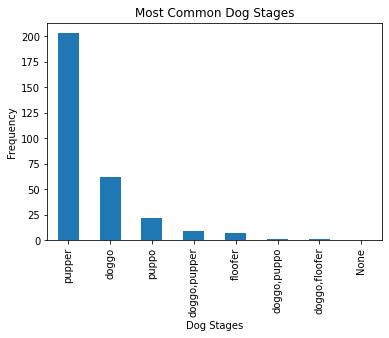

In [59]:
# Create bar plot
twitter_archive_master['dog_stage'].value_counts().plot.bar();
plt.title('Most Common Dog Stages')
plt.xlabel('Dog Stages')
plt.ylabel('Frequency');

#### Dogtionary: The Various Stages of Dog
* Doggo:
    * A big pupper, usually older. A pupper that appears to have its life in order.
* Pupper:
    * A small doggo, usually younger. A doggo that is inexperienced, unfamiliar, or in any way unprepared for the responsibilities associated with being a doggo.
* Puppo:
    * A transitional phase between pupper and doggo. A dog with a mixed bag of both pupper and doggo tendencies.
* Floofer:
    * Any dog really. Commonly given to dogs with seemingly excess fur.

## Most Common Dog Breeds

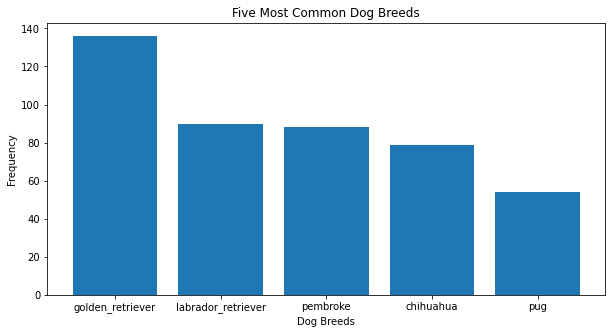

In [60]:
# Create bar chart based on `prediction_1` being true
p1_true = twitter_archive_master.p1_dog == True
height = twitter_archive_master[p1_true].prediction_1.value_counts().head(5).values
bars = twitter_archive_master[p1_true].prediction_1.value_counts().head(5).index
y_pos = np.arange(len(bars))
plt.figure(figsize = (10,5))
plt.bar(y_pos, height)
plt.title("Five Most Common Dog Breeds")
plt.xlabel('Dog Breeds')
plt.ylabel('Frequency')
plt.xticks(y_pos, bars)
plt.show();

#### Least Common Dog Breeds

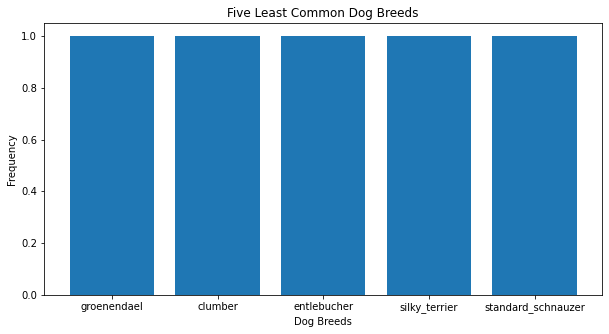

In [61]:
# Create bar chart for the LEAST common breeds
p1_true = twitter_archive_master.p1_dog == True
height = twitter_archive_master[p1_true].prediction_1.value_counts().tail(5).values
bars = twitter_archive_master[p1_true].prediction_1.value_counts().tail(5).index
y_pos = np.arange(len(bars))
plt.figure(figsize = (10,5))
plt.bar(y_pos, height)
plt.title("Five Least Common Dog Breeds")
plt.xlabel('Dog Breeds')
plt.ylabel('Frequency')
plt.xticks(y_pos, bars)
plt.show();

## Average Retweets Per Year

In [62]:
# Extract the `year` from `timestamp`
twitter_archive_master['year'] = twitter_archive_master['timestamp'].dt.year

In [63]:
# Confirm
twitter_archive_master[['timestamp', 'year']].tail()

,timestamp,year
2054,2017-07-29 16:00:24+00:00,2017
2055,2017-07-30 15:58:51+00:00,2017
2056,2017-07-31 00:18:03+00:00,2017
2057,2017-08-01 00:17:27+00:00,2017
2058,2017-08-01 16:23:56+00:00,2017


In [64]:
# Convert to integer
twitter_archive_master['year'] = twitter_archive_master['year'].astype(str)

In [65]:
# Confirm years
twitter_archive_master.year.unique()

array(['2015', '2016', '2017'], dtype=object)

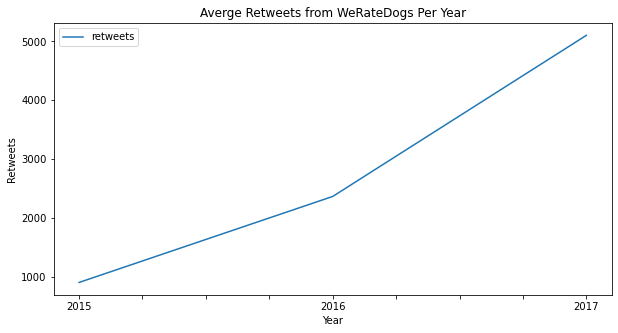

In [66]:
# Create line graph
pd.DataFrame(twitter_archive_master.groupby('year').mean()).reset_index().plot.line(x='year', y = 'retweets', figsize= (10,5))
plt.xlabel('Year');
plt.ylabel('Retweets');
plt.title('Averge Retweets from WeRateDogs Per Year');

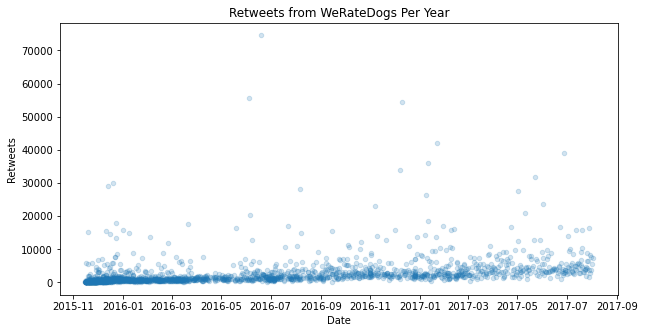

In [67]:
# Create scatter plot as alternative visualization
twitter_archive_master.plot(kind='scatter',x='timestamp',y='retweets', alpha = 0.2, figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Retweets')
plt.title('Retweets from WeRateDogs Per Year');

## Most Popular Source

In [68]:
# Check sources
twitter_archive_master.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck']
Categories (3, object): ['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck']

In [69]:
# Check source counts
twitter_archive_master.source.value_counts()

Twitter for iPhone    1934
Twitter Web Client      28
TweetDeck                9
Name: source, dtype: int64

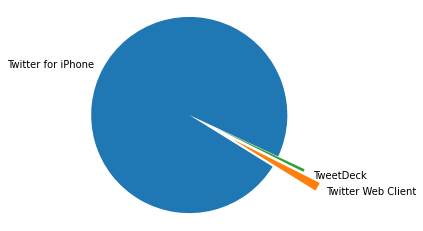

In [70]:
# Create pie chart
source_count = list(twitter_archive_master[twitter_archive_master['source'] != 'None']['source'].value_counts())
sources = twitter_archive_master[twitter_archive_master['source'] != 'None']['source'].value_counts().index.tolist()
explode = (0, 0.5, 0.3)

fig1, ax1 = plt.subplots()
ax1.pie(source_count, explode = explode, labels = sources, shadow = False, startangle = -25)
ax1.axis('equal');

#### Improvements
* Improve legibility of pie chart
* Increase font-size
* Add colored legend

<a id='conclusions'></a>
## Conclusions

[WeRateDogs](https://twitter.com/dog_rates) is a Twitter account that rates people's dogs with a humorous comment about the dog. Dogs are rated with a denominator of 10 but because they are such good puppers, they are frequently rated above 10. For this project, I set a maximum numerator of 15 in order to filter outliers.

I'm able to conclude that if a persons dog is selected to be posted to Twitter by WeRateDogs, they will most likely be doing so from their iPhone, and the dog will most likely be a golden retriever that will be deemed a "pupper". 